In [103]:
from sklearn.datasets import make_blobs
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, r2_score, mean_squared_error
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn import tree

Задача Классификации

Text(0, 0.5, 'X2')

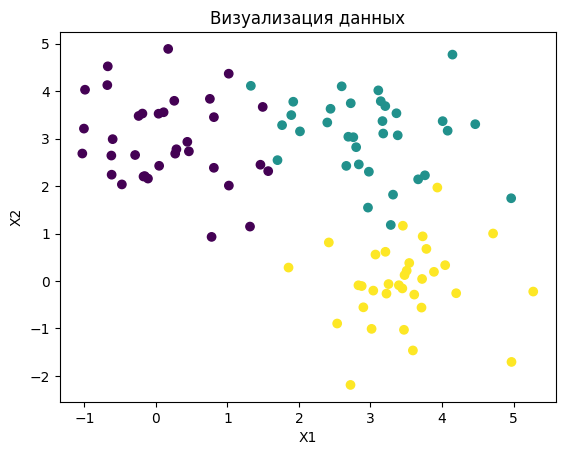

In [3]:
X, y = make_blobs(n_samples=100, centers=[(0,3),(3,3),(3,0)],
                                      n_features=2, random_state=1,
                                      cluster_std=(0.9,0.9,0.9))
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title('Визуализация данных')
plt.xlabel('X1')
plt.ylabel('X2')

In [6]:
depth=4
clf_tree = DecisionTreeClassifier(criterion='entropy', max_depth=depth,
                                  random_state=1)
clf_tree.fit(X, y)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=1)

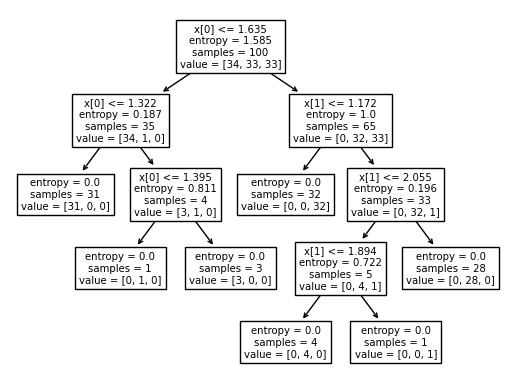

In [11]:
tree.plot_tree(clf_tree)
plt.show()

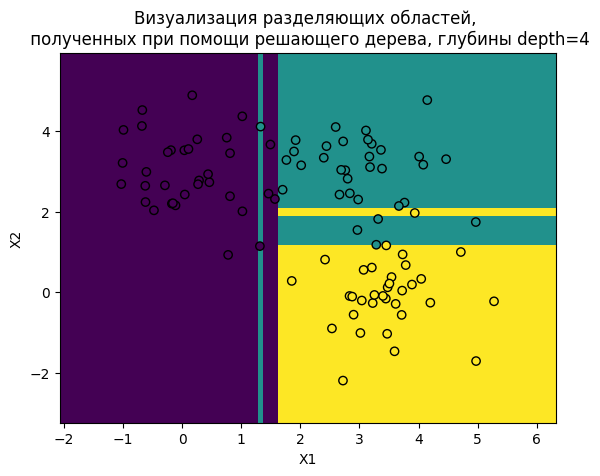

In [12]:
X0 = np.linspace(X[:, 0].min()-1,X[:, 0].max()+1, X.shape[0])
X1 = np.linspace(X[:, 1].min()-1,X[:, 1].max()+1, X.shape[0])
X0_grid, X1_grid = np.meshgrid(X0, X1)

y_predict = clf_tree.predict(np.c_[X0_grid.ravel(),X1_grid.ravel()]).reshape(X0_grid.shape)
plt.pcolormesh(X0_grid, X1_grid, y_predict)

plt.scatter(X[:, 0], X[:, 1], c=y,  edgecolors='black',linewidth=1)

plt.title('Визуализация разделяющих областей, \n полученных при помощи решающего дерева, глубины depth={}'.format(depth))
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [15]:
y_pred = clf_tree.predict(X)
print(confusion_matrix(y, y_pred))
print('Accuracy =', accuracy_score(y, y_pred))
print('F1_score =', f1_score(y, y_pred, average='micro'))

[[34  0  0]
 [ 0 33  0]
 [ 0  0 33]]
Accuracy = 1.0
F1_score = 1.0


In [16]:
observation_new = [[2, 1]]
clf_tree.predict(observation_new)

array([2])

Задача Регрессии

In [42]:
n_samples = 100
X = np.sort(np.random.rand(n_samples))
X1 = np.sort(np.random.rand(n_samples))
X2 = np.array([(X[i] + X1[i]) // 2 for i in range(len(X))])
x = list(zip(X, X1))
y = np.exp(X2 ** 2)+np.random.normal(0.0, 0.1, X2.shape[0])
y1 = np.exp(X ** 2)+np.random.normal(0.0, 0.1, X.shape[0])

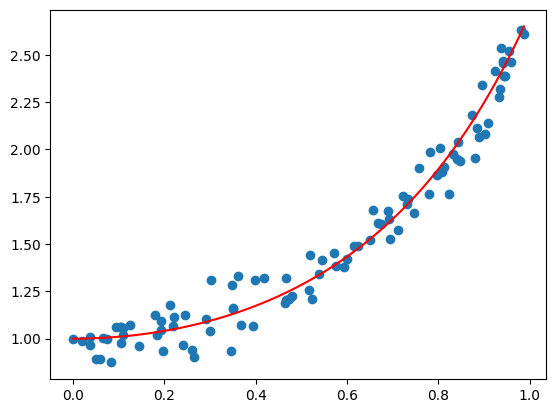

In [44]:
X1 = np.linspace(X.min(),X.max(), X.shape[0])
Y1 = [np.exp(i ** 2) for i in X1]
plt.scatter(X, y1)
plt.plot(X1, Y1, color = 'red')

In [56]:
depth=3
X = X.reshape(-1, 1)
reg_tree = DecisionTreeRegressor(max_depth=depth, random_state=2)
reg_tree.fit(X, y1)

DecisionTreeRegressor(max_depth=3, random_state=2)

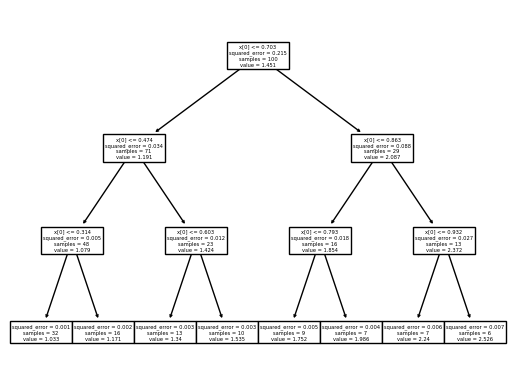

In [54]:
tree.plot_tree(reg_tree)
plt.show()

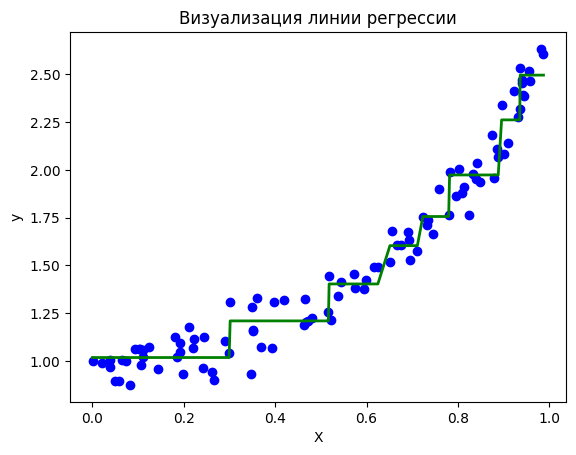

In [57]:
y_pred = reg_tree.predict(X)
plt.scatter(X, y1, c="b")

plt.plot(X, y_pred, "g", lw=2)

plt.title('Визуализация линии регрессии')
plt.xlabel('X')
plt.ylabel('y');

In [60]:
print('r2= ', r2_score(y1, y_pred))
print('MSE= ', mean_squared_error(y1, y_pred))

r2=  0.9697251521767091
MSE=  0.007697729827714339


In [62]:
observation_new = [[0.7]]
reg_tree.predict(observation_new)

array([1.60320261])

1. Загрузите встроенные данные sklearn.datasets.load_iris, взяв только последние два столбца (длина и ширина лепестков). Изобразите их на диаграмме рассеяния, подкрасив каждый класс некоторым цветом.

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

In [77]:
data = load_iris()
X = data.data[:, 2:]
Y = data.target

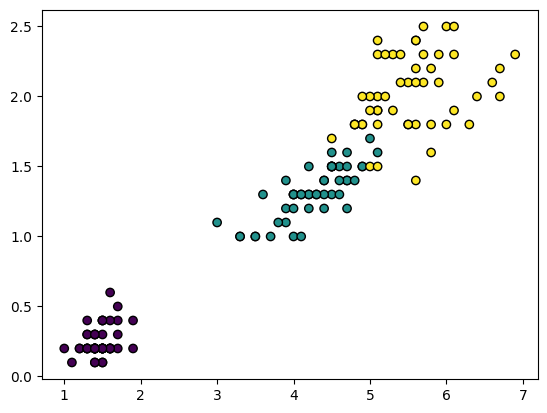

In [78]:
plt.scatter(X[:, 0], X[:, 1], c=Y,  edgecolors='black', linewidth=1)

2. Обучите модель классификационного дерева принятия решений sklearn.tree.DecisionTreeClassifier глубины 4, используя энтропию. Визуализируйте соответствующий граф дерева принятия решений.

In [86]:
depth = 4
reg_tree = DecisionTreeClassifier(max_depth = depth, criterion='entropy')
reg_tree.fit(X, Y)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

3. Обучите модель классификационного дерева принятия решений sklearn.tree.DecisionTreeClassifier с разными глубинами (1, 2, 3, 4, 10), используя энтропию, и визуализируйте в каждом случае полученные разделяющие области.

In [81]:
from mlxtend.plotting import plot_decision_regions

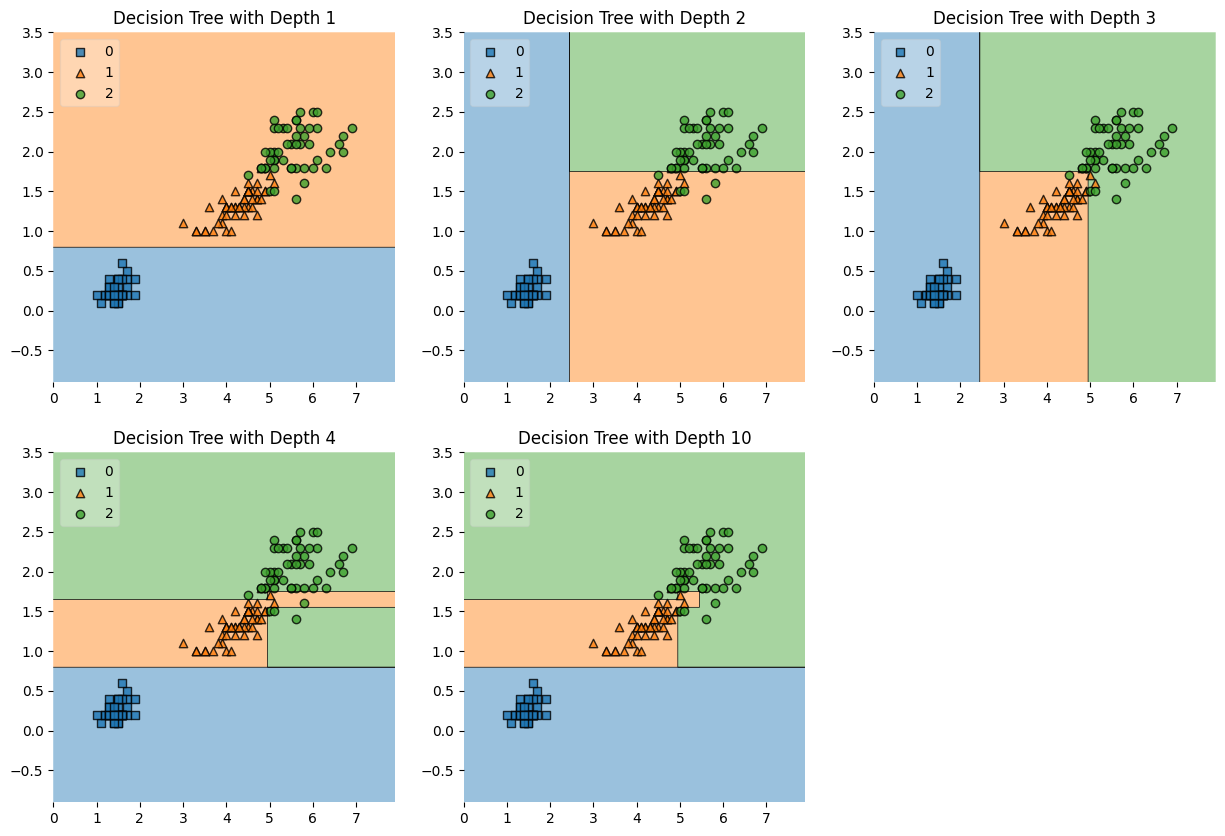

In [93]:
depths = [1, 2, 3, 4, 10]
plt.figure(figsize=(15, 10))
metrics = []

for i, depth in enumerate(depths):
    clf = DecisionTreeClassifier(max_depth=depth, criterion='entropy')
    clf.fit(X, Y)

    metrics.append(list(clf.predict(X)))

    plt.subplot(2, 3, i+1)
    plot_decision_regions(X, Y, clf=clf, legend=2)
    plt.title(f'Decision Tree with Depth {depth}')

plt.show()

4. Выведите необходимые метрики для оценки работы моделей с разными глубинами. Сделайте вывод о том, какая модель лучше классифицирует данные.

In [95]:
for i in range(len(metrics)):
  print(f"Метрики для модели с глубиной {depths[i]}")
  print('r2= ', r2_score(Y, metrics[i]))
  print('MSE= ', mean_squared_error(Y, metrics[i]))

Метрики для модели с глубиной 1
r2=  0.5
MSE=  0.3333333333333333
Метрики для модели с глубиной 2
r2=  0.94
MSE=  0.04
Метрики для модели с глубиной 3
r2=  0.96
MSE=  0.02666666666666667
Метрики для модели с глубиной 4
r2=  0.98
MSE=  0.013333333333333334
Метрики для модели с глубиной 10
r2=  0.99
MSE=  0.006666666666666667


5. Загрузите весь датасет load_iris. Обучите модель классификационного дерева принятия решений sklearn.tree.DecisionTreeClassifier глубины 4, используя энтропию. Визуализируйте соответствующий граф дерева решений. Оцените качество работы модели.

In [96]:
X_full = data.data
Y_full = data.target

In [105]:
depth = 4
reg_tree_full = DecisionTreeClassifier(max_depth = depth, criterion='entropy')
reg_tree_full.fit(X_full, Y_full)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

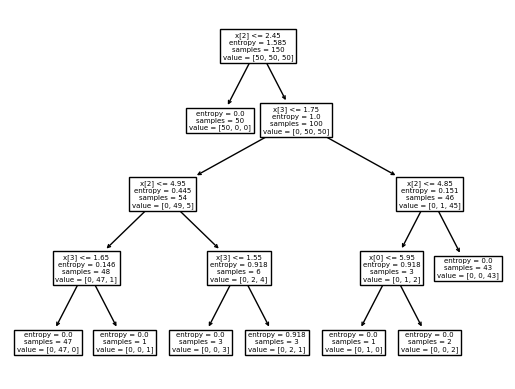

In [106]:
tree.plot_tree(reg_tree_full)
plt.show()

In [107]:
print('r2= ', r2_score(Y_full, reg_tree_full.predict(X_full)))
print('MSE= ', mean_squared_error(Y_full, reg_tree_full.predict(X_full)))

r2=  0.99
MSE=  0.006666666666666667


6. Загрузите встроенные данные sklearn.datasets.california_housing, взяв только столбец AveBedrms в качестве единственного признака. Изобразите данные на диаграмме рассеяния так, чтобы на одной оси были отмечены значения признака, а на другой - целевой переменной.

In [108]:
from sklearn.datasets import fetch_california_housing

In [129]:
data = fetch_california_housing()
X_hous = data.data[:][3]
Y_hous = data.target

In [133]:
california_df = pd.DataFrame(data.data, columns=data.feature_names)
california_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [135]:
X_hous = list(california_df['AveBedrms'])
Y_hous = data.target

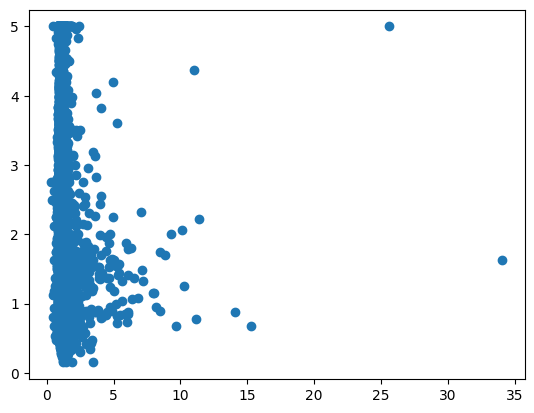

In [136]:
plt.scatter(X_hous, Y_hous)

7. Обучите модель регрессионного дерева принятия решений sklearn.tree.DecisionTreeRegressor, зафиксировав random_state=0, а остальными гиперпараметрами по умолчению.

In [175]:
X_hous = np.array(X_hous).reshape(-1, 1)
reg_tree_hous = DecisionTreeRegressor(random_state=0)
reg_tree_hous.fit(X_hous, Y_hous)

DecisionTreeRegressor(random_state=0)

8. Визуализируйте соответствующий граф дерева решений и получившуюся кусочную линию регрессии.

In [167]:
X_forplot.reshape(-1, 1)

array([[ 0.33333333],
       [ 0.33496778],
       [ 0.33660223],
       ...,
       [34.06339777],
       [34.06503222],
       [34.06666667]])

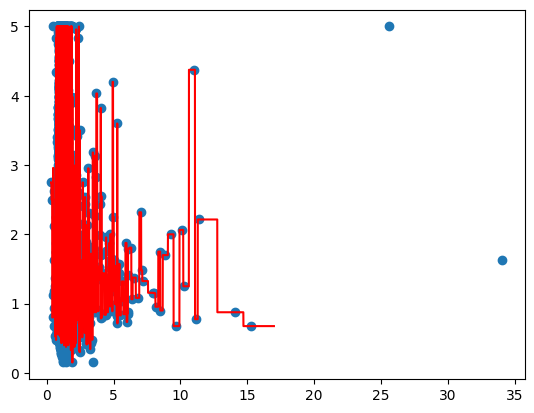

In [178]:
X_forplot = np.linspace(X_hous.min(),X_hous.max() // 2, X_hous.shape[0])
Y_forplot = reg_tree_hous.predict(X_forplot.reshape(-1, 1))
plt.scatter(X_hous, Y_hous)
plt.plot(X_forplot, Y_forplot, color = 'red')

KeyboardInterrupt: 

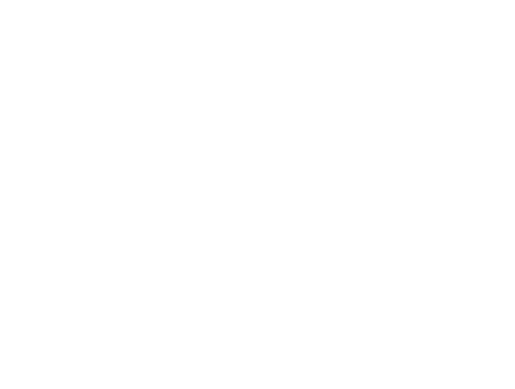

In [179]:
tree.plot_tree(reg_tree_hous)
plt.show()

9. Оцените качество работы модели. Создайте новое наблюдение и сделайте предсказание на нём.

In [180]:
print('r2 = ', r2_score(Y_hous, reg_tree_hous.predict(X_hous)))
print('MSE = ', mean_squared_error(Y_hous, reg_tree_hous.predict(X_hous)))

r2 =  0.679172913720798
MSE =  0.4271974030094434


In [183]:
new_search = np.array([12.5])
reg_tree_hous.predict(new_search.reshape(-1, 1))

array([2.214])

10. Загрузите весь датасет fetch_california_housing. Обучите ту же модель. Визуализируйте соответствующий граф дерева решений и оцените качество работы модели.

In [198]:
data = fetch_california_housing()
X = data.data
y = data.target

In [199]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeRegressor()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("r2 = :", r2)
print("mse = :", mse)

r2 = : 0.6159353211903085
mse = : 0.5032818033374272


In [193]:
tree.plot_tree(model)
plt.show()

KeyboardInterrupt: 